In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data_preprocessing import preprocess_data


In [2]:
FILE_NAME = "s4"
file_path = rf'..\data\raw\{FILE_NAME}.txt' 

# The regular expression '\s+' can be used to match one or more spaces
data = pd.read_csv(file_path, sep="\s+", header=None, names=['X', 'Y'])

In [3]:
# Check the first few rows of your DataFrame
data.head()

,X,Y
0,624474,837604
1,673412,735362
2,647442,677000
3,532283,741384
4,646529,742844


In [13]:
print(data.dtypes)


X    int64
Y    int64
dtype: object


In [4]:
# Check for NaN or missing values
data.isna().sum()

X    0
Y    0
dtype: int64

In [5]:
data.shape

(5000, 2)

In [6]:
# Remove rows with missing values:
data_clean = data.dropna() 

# Replace missing values (e.g., with the mean):
# data_clean = data.fillna(data.mean())

In [7]:
data.shape

(5000, 2)

In [12]:
data_clean.shape

(5000, 2)

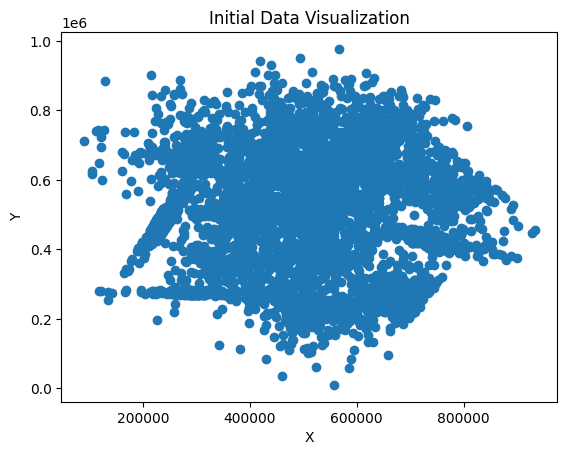

In [8]:
plt.scatter(data_clean['X'], data_clean['Y'])
plt.title('Initial Data Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
processed_data = preprocess_data(data)
processed_data.head()

,X,Y
0,0.634221,0.855717
1,0.692249,0.750053
2,0.661455,0.689738
3,0.524905,0.756277
4,0.660372,0.757786


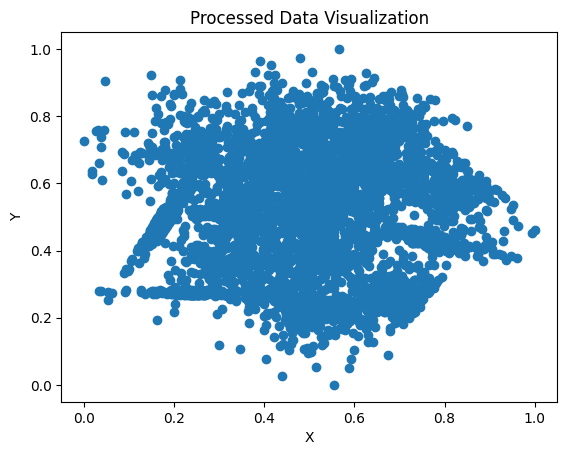

In [10]:
plt.scatter(processed_data['X'], processed_data['Y'])
plt.title('Processed Data Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
# Save the processed data to a CSV file
processed_data_path = rf'..\data\processed\{FILE_NAME}.txt'
processed_data.to_csv(processed_data_path, index=False)
processed_data_path

'..\\data\\processed\\s4.txt'

In [18]:
import numpy as np
eps_exponents = np.random.uniform(-3, 1, 100)
eps_values = 10 ** eps_exponents
eps_values

array([2.36324900e+00, 3.74629279e+00, 1.77603946e-02, 1.15608245e-02,
       1.16662517e-01, 4.89285306e-01, 3.40499058e+00, 7.65230985e-03,
       5.78796763e-03, 1.44642495e+00, 2.30871426e+00, 3.03716385e-02,
       4.42804644e-01, 9.42377597e-02, 8.10463938e-02, 1.54171112e-01,
       2.49182440e-03, 3.88319967e-01, 9.46167034e-02, 9.63874473e-01,
       2.04556296e-01, 1.01304152e-03, 6.40168945e-01, 2.89953912e-03,
       3.47177513e+00, 6.45555147e+00, 2.03922070e+00, 5.11657791e-03,
       1.10466861e-02, 1.61227698e+00, 1.70941092e-03, 3.25537159e-03,
       3.62845824e-02, 3.13750866e-02, 7.44656832e-02, 3.53467932e+00,
       1.49948562e-01, 2.37605565e-02, 5.62891066e-02, 1.42344008e-02,
       3.19831506e+00, 2.41000255e-02, 1.66988097e-03, 6.31451745e-02,
       4.42257149e-02, 1.02563349e+00, 1.27538290e+00, 6.59873930e-01,
       7.37270209e+00, 4.09209880e-01, 2.10230466e-03, 1.28181824e-03,
       6.50552741e-03, 2.60790145e-03, 2.14761996e+00, 4.81188146e-02,
      

In [17]:
np.linspace(0.5, 0.99, 10)

array([0.5       , 0.55444444, 0.60888889, 0.66333333, 0.71777778,
       0.77222222, 0.82666667, 0.88111111, 0.93555556, 0.99      ])

In [23]:
N_CLUSTERS = 15
N_DIMENSIONS = 2

# Exponent value generation technique
# Generate 20 random exponent values uniformly between -4 and 1 for DBSCAN's eps
eps_exponents = np.random.uniform(-3, 1, 100)
eps_values = 10 ** eps_exponents

# For AffinityPropagation's 'preference'
preference_exponents = np.random.uniform(-2, 1, 50)  # Choosing an exponent range
preference_values = 10 ** preference_exponents

# For BIRCH's 'threshold'
threshold_exponents = np.random.uniform(-1, 0, 30)  # Generating values between 10^-1 and 10^0
threshold_values = 10 ** threshold_exponents
hyperparameter_domains = {
    'KMeans': {
        'n_clusters': [N_CLUSTERS],
        'init': ['k-means++', 'random'],
        'n_init': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        'max_iter': [100, 300, 1000, 1500, 2000, 3000, 4000, 5000],
        'algorithm': ['auto', 'elkan', 'full']
    },
    'DBSCAN': {
        'eps': eps_values,  # Generated eps_values
        'min_samples': [N_DIMENSIONS + 1, 5, 10, 20, 30]  # Adjusting to N_DIMENSIONS + 1 based on dimensionality
    },
    'AffinityPropagation': {
        'damping': np.linspace(0.5, 0.99, 10),
        'preference': preference_values,  # log-scale generated values
    },
    'BIRCH': {
        'threshold': threshold_values,  # log-scale generated values
        'branching_factor': list(range(10, 100, 5)),  # Keeping linear steps
        'n_clusters': [N_CLUSTERS]
    },
    # 'Fuzzy C Means': {
    #     'tolerance': [1e-4, 1e-3, 1e-2],
    #     'itermax': list(range(100, 1000, 100)),
    #     'm': np.linspace(1.1, 2.0, 10)
    # },
    'OPTICS': {
        'min_samples': [10, 20, 50],
        'max_eps': [1, 5, 7.5, np.inf],
        'metric': ['euclidean', 'cosine'],
        'xi': np.linspace(0.01, 0.1, 5),
        'min_cluster_size': [None, 5, 10, 20]
    },
    'Mean Shift': {
        'bandwidth': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0],
        'bin_seeding': [True, False],
        'min_bin_freq': [None, 5, 10, 20],
        'cluster_all': [True, False],
        'max_iter': [100, 300, 1000, 5000]
    },
    'AgglomerativeClustering': {
        'n_clusters': [N_CLUSTERS],
        'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed'],
        'linkage': ['ward']
    },
    'BisectingKMeans': {
        'n_clusters': [N_CLUSTERS],
        'init': ['k-means++'],
        'n_init': [1, 10, 15, 20],
        'tol': [1e-4, 1e-3, 1e-2],
        'max_iter': [50, 100, 300, 1000, 5000],
        'algorithm': ['lloyd'],
        'bisecting_strategy': ['biggest_inertia', 'biggest_cluster']
    },
    # 'CURE': {
    #     'number_cluster': [N_CLUSTERS],
    #     'number_represent_points': list(range(1, 15)),
    #     'compression': np.linspace(0.05, 0.95, 19)
    # },
    # 'CLIQUE': {
    #     'amount_intervals': list(range(2, 20)),
    #     'density_threshold': list(range(1, 10))
    # }
}

algorithms = ['KMeans', 'DBSCAN', 'AffinityPropagation', 'BIRCH',  'OPTICS', 'Mean Shift', 'AgglomerativeClustering', 'BisectingKMeans']


for algorithm_name in algorithms:
    print(hyperparameter_domains[algorithm_name])

{'n_clusters': [15], 'init': ['k-means++', 'random'], 'n_init': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_iter': [100, 300, 1000, 1500, 2000, 3000, 4000, 5000], 'algorithm': ['auto', 'elkan', 'full']}
{'eps': array([3.21153853e-01, 2.83410272e-03, 1.15890563e-01, 9.42926253e-01,
       6.49119197e-02, 1.42372883e-01, 4.70985564e+00, 8.02909980e-02,
       7.07529348e+00, 7.45598193e-03, 5.04321954e-03, 4.02319730e-01,
       5.56604475e-02, 1.36891575e-02, 4.46638006e+00, 1.91921404e-02,
       3.73768787e+00, 3.46106484e-01, 2.49048834e-03, 2.40709068e+00,
       8.78370106e+00, 6.16024536e+00, 9.38912836e+00, 3.58152728e+00,
       7.76388343e-03, 3.06766338e-02, 3.47292523e-03, 5.93309162e-02,
       1.65954915e-03, 2.43484735e+00, 2.99709807e-02, 2.80600397e+00,
       5.35758089e-02, 7.15374045e-01, 7.45473912e-01, 8.03247344e-03,
       1.55639363e+00, 1.55868160e-02, 2.67133897e-02, 6.02897422e+00,
       2.31440003e-02, 4.29744851e-01, 3.34711892e-02, 4.19153927e-02,
      

In [24]:
inf = float('inf')
inf

inf